# **Diabetes Prediction**

*Predict whether a person has diabetes or not.*


In [3]:
# Importing essential libraries
import numpy as np
import pandas as pd
import joblib

# **Load the dataset**

In [4]:
# Loading the dataset
df = pd.read_csv('C:/Users/kanag/Downloads/kaggle_diabetes_updated.csv')

# Exploring the dataset

In [5]:
# Returns number of rows and columns of the dataset
df.shape

(2000, 9)

In [6]:
# Returns an object with all of the column headers 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Pregnancies        int64
Glucose          float64
BloodPressure    float64
SkinThickness    float64
Insulin          float64
BMI              float64
DPF              float64
Age              float64
Outcome            int64
dtype: object

In [8]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,147.967142,63.834874,34.143011,0.000000,33.412054,0.195741,43.429593,1
1,0,87.617357,81.481749,30.889001,134.063895,39.338703,0.149051,21.845346,0
2,0,156.476885,1.138125,0.000000,10.540506,43.718950,0.623610,28.289699,1
3,0,155.230299,73.573659,42.720836,274.178910,43.030096,0.372917,23.260021,1
4,1,141.658466,70.389283,43.894357,448.994249,37.465963,0.546795,21.929248,0


In [9]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2000 non-null   int64  
 1   Glucose        2000 non-null   float64
 2   BloodPressure  2000 non-null   float64
 3   SkinThickness  2000 non-null   float64
 4   Insulin        2000 non-null   float64
 5   BMI            2000 non-null   float64
 6   DPF            2000 non-null   float64
 7   Age            2000 non-null   float64
 8   Outcome        2000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 140.8 KB


In [10]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.703500,3.306063,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,2000.0,126.643967,33.123697,0.000000,103.885150,123.567250,146.688114,227.527315
BloodPressure,2000.0,71.193985,19.650467,0.000000,64.235866,73.441977,82.320618,123.808381
SkinThickness,2000.0,21.550664,15.929904,0.000000,2.860947,23.587529,33.352372,111.639753
Insulin,2000.0,92.584825,111.862975,0.000000,8.964203,51.784558,141.271821,794.530473
BMI,2000.0,33.684991,8.516338,0.000000,28.386752,33.572226,38.525997,85.086481
DPF,2000.0,0.482747,0.326724,0.012857,0.249106,0.391017,0.643005,2.528103
Age,2000.0,35.068151,12.700750,11.492641,25.725727,32.186924,42.231077,83.620878
Outcome,2000.0,0.342000,0.474498,0.000000,0.000000,0.000000,1.000000,1.000000


In [11]:
# Returns true for a column having null values, else false
df.isnull().any()

Pregnancies      False
Glucose          False
BloodPressure    False
SkinThickness    False
Insulin          False
BMI              False
DPF              False
Age              False
Outcome          False
dtype: bool

In [12]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,147.967142,63.834874,34.143011,0.000000,33.412054,0.195741,43.429593,1
1,0,87.617357,81.481749,30.889001,134.063895,39.338703,0.149051,21.845346,0
2,0,156.476885,1.138125,0.000000,10.540506,43.718950,0.623610,28.289699,1
3,0,155.230299,73.573659,42.720836,274.178910,43.030096,0.372917,23.260021,1
4,1,141.658466,70.389283,43.894357,448.994249,37.465963,0.546795,21.929248,0


In [13]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

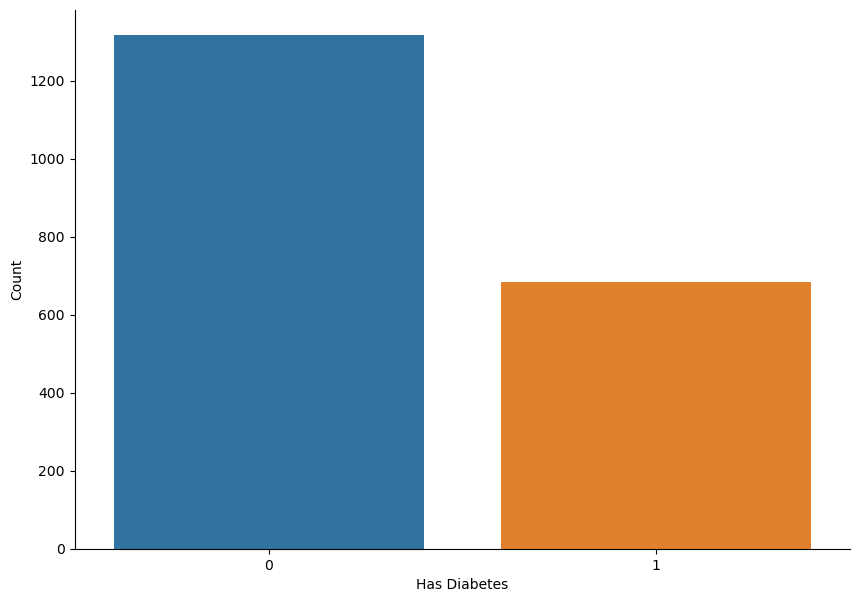

In [14]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

# Data Cleaning

In [15]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose            4
BloodPressure     23
SkinThickness    240
Insulin          369
BMI               10
DPF                0
Age                0
Outcome            0
dtype: int64

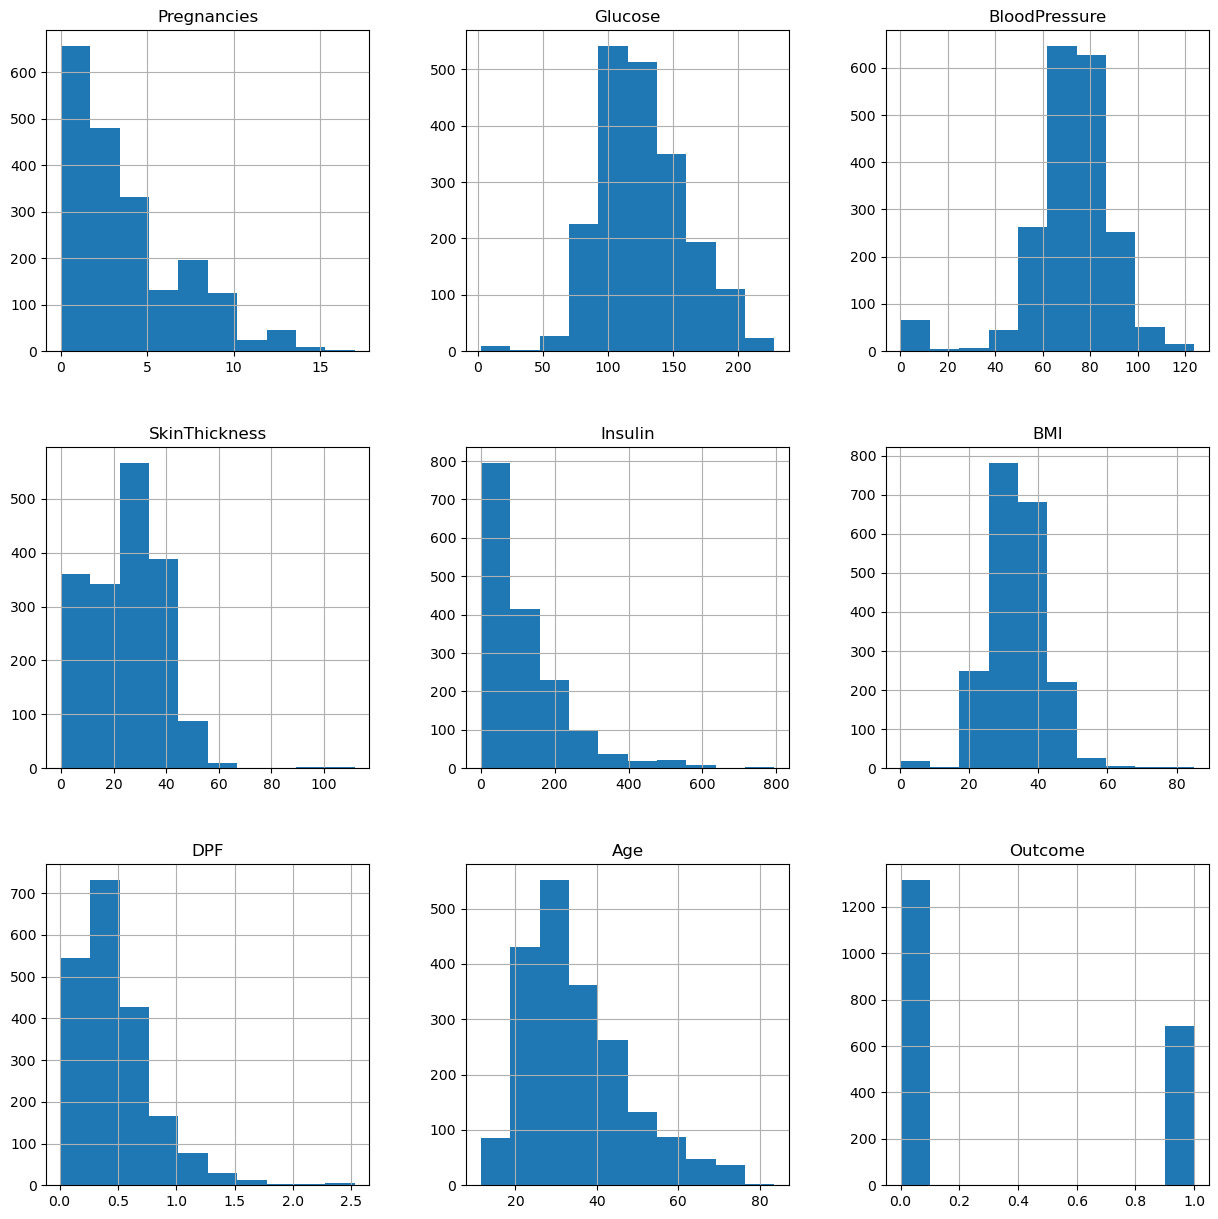

In [16]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

In [17]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

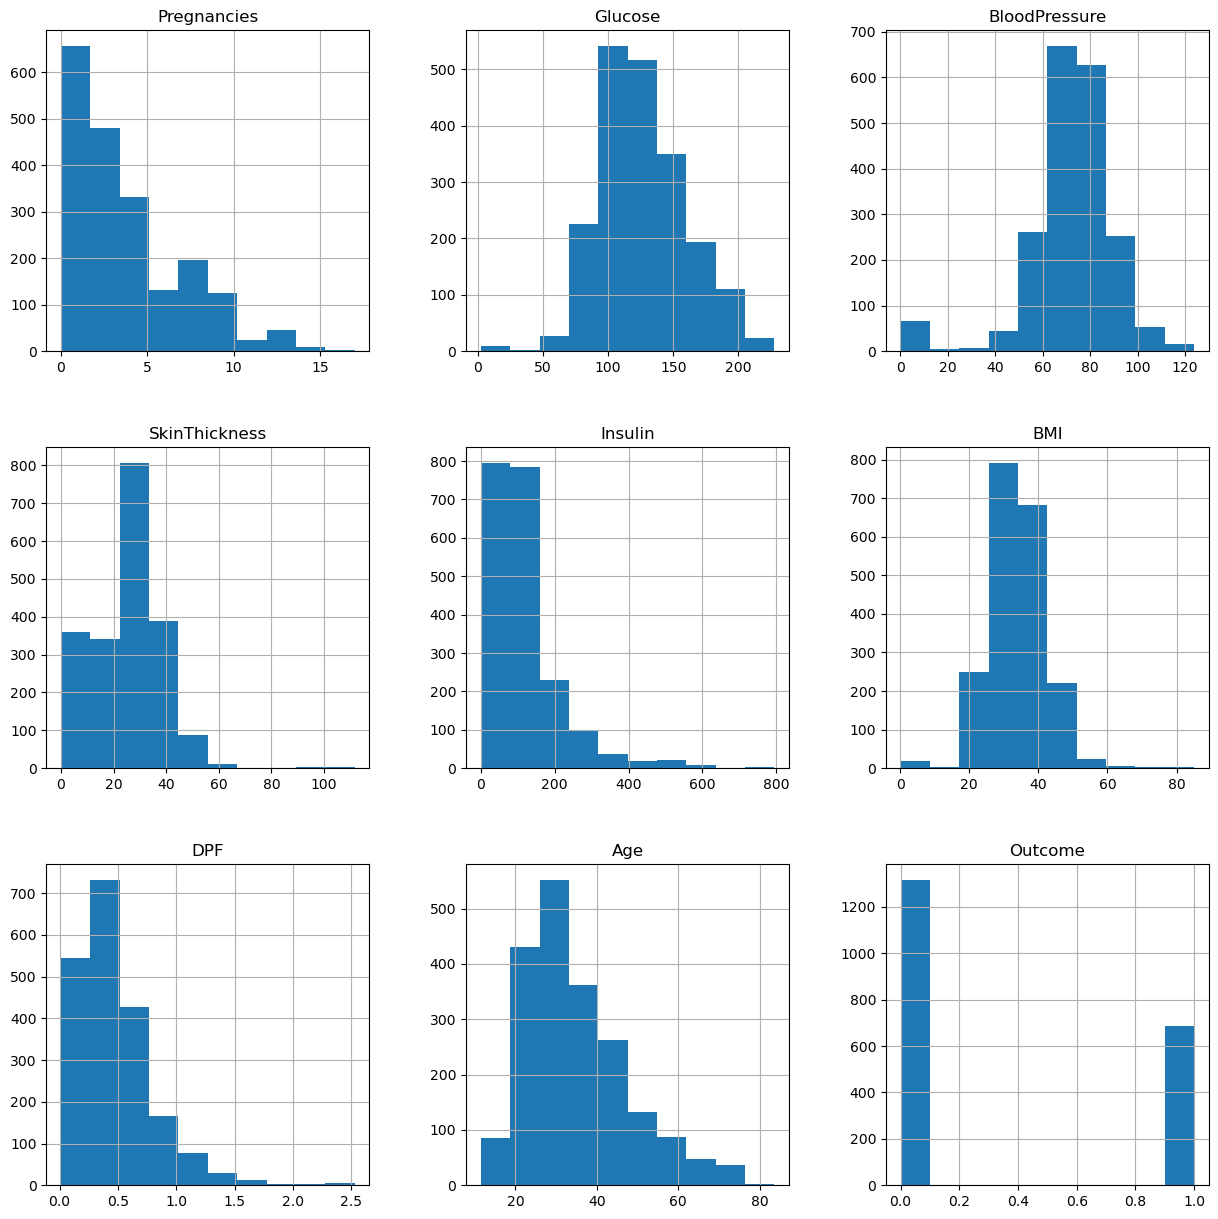

In [18]:
# Plotting histogram of dataset after replacing NaN values
p = df_copy.hist(figsize=(15,15))

In [19]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

# Model Building

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

df= df.fillna(df.median())

# Split features and label
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scale features
sc = StandardScaler()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# Using GridSearchCV to find the best algorithm for this problem
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, ShuffleSplit


In [34]:
# Creating a function to calculate best model for this problem

# Function to find the best model
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42),
            'parameters': {
                'C': [1, 5, 10]
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5, 10, 15]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100, 200, 300],
                'max_depth': [8, 10, 12, None],
                'min_samples_split': [2, 5],
                'max_features': ['sqrt', 'log2']
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1, 5, 20],
                'kernel': [ 'linear']
            }
        }
    }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], 
                          model_params['parameters'], 
                          cv=cv_shuffle, 
                          return_train_score=False,
                          n_jobs=-1)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    results = pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])
    
    # Print and highlight the best model
    best_model = results.loc[results['score'].idxmax()]
    print("Best Model:", best_model['model'])
    print("Best Parameters:", best_model['best_parameters'])
    print("Best CV Score:", round(best_model['score'], 4))
    
    return results

# Example usage (assuming X_train, y_train are ready)
# best_models = find_best_model(X_train, y_train)
# best_models

find_best_model(X_train, y_train)

Best Model: random_forest
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.8094


,model,best_parameters,score
0,logistic_regression,{'C': 1},0.763125
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 5}",0.744375
2,random_forest,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.809375
3,svm,"{'C': 1, 'kernel': 'linear'}",0.770625


*Note: Since the Random Forest algorithm has the highest accuracy, we futher fine tune the model using hyperparameter optimization.*

In [36]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 80%


In [37]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

# Model Evaluation

In [38]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[251,  21],
       [ 51,  77]], dtype=int64)

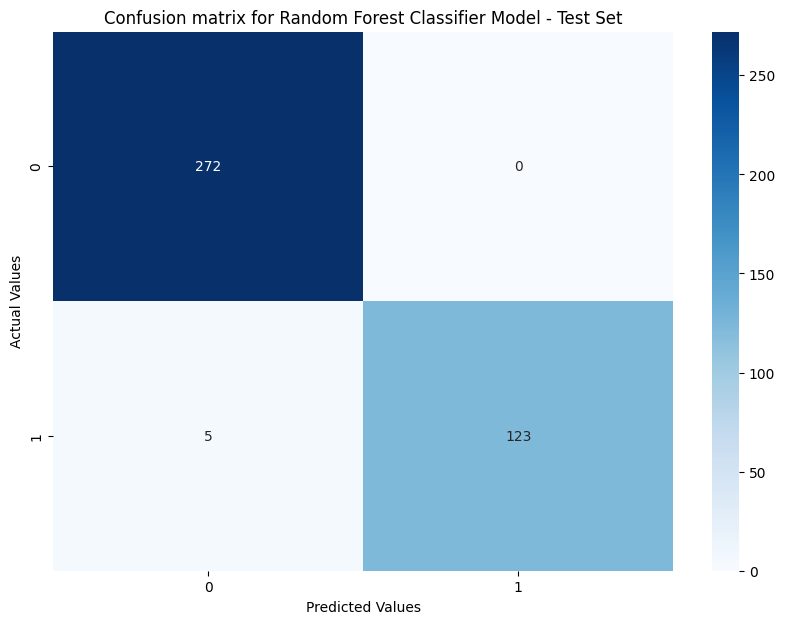

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [39]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 82.0%


In [40]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       272
           1       0.79      0.60      0.68       128

    accuracy                           0.82       400
   macro avg       0.81      0.76      0.78       400
weighted avg       0.82      0.82      0.81       400



In [41]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1044,    0],
       [   2,  554]], dtype=int64)

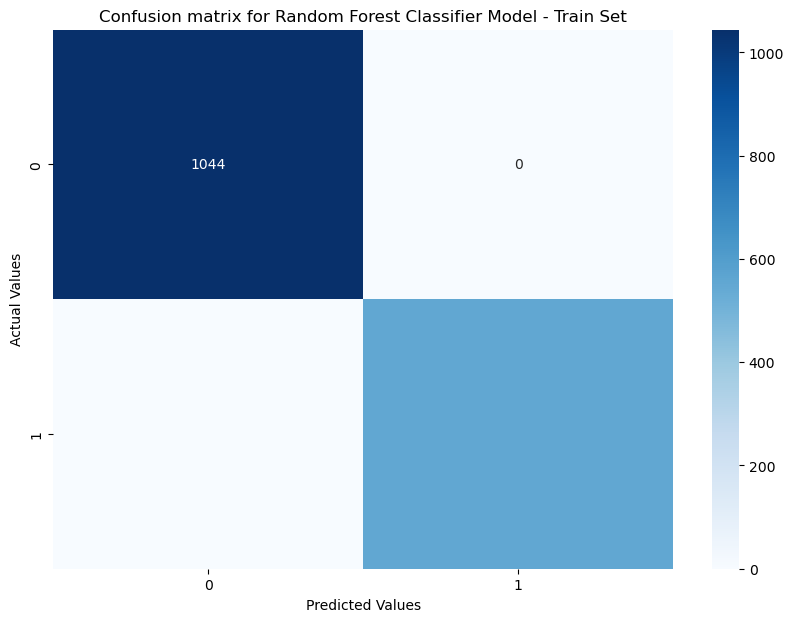

In [42]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [43]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 99.88%


In [44]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



# Predictions

In [45]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [46]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Oops! You have diabetes.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
